


Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Tudo certo com as questões que estavam faltando. 

Sobre os pontos apontados na v1 para ajuste restou alguma dúvida?
</div>


</div>

<div class="alert alert-info">
<strong>Comentário do estudante v2</strong>

Não, ficou tudo claro e as avaliações foram muito significativas. A única coisa que alterei para ganhar tempo e iniciar as próximas sprints foi que ao invés de preencher os valores ausentes de year_of_release eu apenas deletei os valores (1,6% dos dados), conforme vi também no webinário. Obrigado pelas análises! Bom final de semana.
</div>


## Projeto Integrado - Sprint 06
### Curso de Ciência de Dados - Tripleten
#### Gabriel Veras

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

- #### Baixando o arquivo e transformando-o em um Dataframe para posterior análise exploratória:

In [7]:
df_games = pd.read_csv('/datasets/games.csv') #transformando o arquivo de dados em dataframe pandas
df_games.head() #imprimindo 5 primeiras linhas

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df_games.info() #impressão das principais informações do DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df_games.columns = df_games.columns.str.lower() #Transformando cabeçalhos para formato snake_case
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- #### Análise coluna a coluna:

In [10]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df_games.dropna(subset = ['name'], inplace = True) #Removendo linhas com valores NaN na coluna 'name'

In [12]:
df_games[df_games['year_of_release'].isna()] #avaliando valores em branco

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#Avaliando influência dos dados de jogos sem ano de lançamento no total da análise
df_games['year_of_release'].isna().sum() / df_games['year_of_release'].shape[0] * 100

1.6095255190570215

In [14]:
#Devido ao baixo impacto na quantidade de jogos sem ano de lançamento, linhas foram removidas da análise.
df_games = df_games.dropna(subset = ['year_of_release']).reset_index(drop = True)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [15]:
df_games['critic_score'] = df_games['critic_score'] / 10
df_games['critic_score'].unique()

array([7.6, nan, 8.2, 8. , 8.9, 5.8, 8.7, 9.1, 6.1, 9.7, 9.5, 7.7, 8.8,
       8.3, 9.4, 9.3, 8.5, 8.6, 9.8, 9.6, 9. , 8.4, 7.3, 7.4, 7.8, 9.2,
       7.1, 7.2, 6.8, 6.2, 4.9, 6.7, 8.1, 6.6, 5.6, 7.9, 7. , 5.9, 6.4,
       7.5, 6. , 6.3, 6.9, 5. , 2.5, 4.2, 4.4, 5.5, 4.8, 5.7, 2.9, 4.7,
       6.5, 5.4, 2. , 5.3, 3.7, 3.8, 3.3, 5.2, 3. , 3.2, 4.3, 4.5, 5.1,
       4. , 4.6, 3.9, 3.4, 4.1, 3.6, 3.1, 2.7, 3.5, 2.6, 1.9, 2.8, 2.3,
       2.4, 2.1, 1.7, 1.3])

In [16]:
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,6.1,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,7.1,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,6.7,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,5.3,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,4.8,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
#Alterando dados da coluna de 'tbd' para 'NaN'
df_games['user_score'].replace('tbd', np.nan, inplace=True)
df_games['user_score'] = df_games['user_score'].astype(float)

In [18]:
df_games['total_sales'] = df_games['na_sales'] + df_games['jp_sales'] + df_games['other_sales'] 

In [19]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


#### Considerações na análise coluna a coluna:
- Linhas com a coluna "name" em branco foram excluídas, pois de nada adiantaria uma análise se não sabemos de qual jogo estamos falando (apenas dois casos). Estes jogos não possuíam alta representatividade em relação ao valor de vendas. Possivelmente estes valores estavam ausentes por falhas no banco de dados da extração.
- Coluna "platform" OK
- Coluna "year_of_release" possui valores em branco, porém é um percentual pouco representativo na análise (1,6%). Em seguida os dados foram transformados para int. Dados podem estar em branco por alguns motivos: Como algums títulos já contém o ano de lançamento, não foram especificados em outra coluna; jogos muito antigos; jogos desconhecidos; falhas no banco de dados original.
- Colunas referentes a "sales" OK
- Coluna "critic_score" foi dividida por 10 para manter a mesma base da coluna "user_score".
- Coluna "user_score" tinha um valor definido como 'tbd', que impactava a análise pois impedia que convertêssemos a coluna para float (necessários para trabalharmos com ela numericamente no futuro). Sendo assim, os valores foram substituidos por "NaN", conforme sugestão do avaliador.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Gabriel, acredito que podemos melhorar alguns pontos no tratamento do df:
    
- Para o ano de lamnçamento podemos verificar os jogos que possuem o ano preenchido em outra plataforma e para os que persistirem como ausentes usar um valor calculado dentro da respectiva plataforma e não de forma geral (garanta que esse cálculo resulte em um valor inteiro e não decimal)
    
- Para as avaliações, como vamos fazer análises de correlação dessas variáveis com as métricas, a substituição pode gerar viéses na interpretação. Sugiro que os mantenha como ausentes
    
- Estou de acordo com as demais decisões.
    
</div>


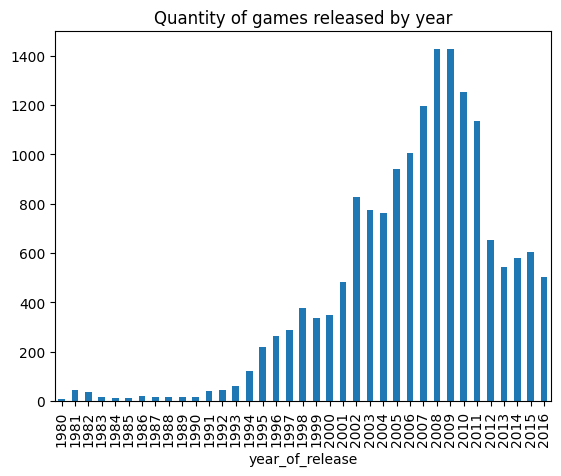

In [20]:
year_groupby = df_games.groupby(by = 'year_of_release')['name'].count()
year_groupby.plot(kind = 'bar', title = 'Quantity of games released by year')
plt.show()

No gráfico acima podemos ver alguns pontos marcantes: 1991, onde a quantidade de jogos lançados passou a crescer exponencialmente até estabilizar, 2001 quando esta curva volta a crescer de forma acelerada e assim se mantém até 2011, quando se estabiliza e se mantém num nível intermediário desde então. Este comportamento pode ser devido ao aumento da complexidade e tempo de desenvolvimento de jogos, como também a necessidade de manutenção, que inviabilizam um portfolio muito vasto a longo prazo.

In [21]:
year_plat_groupby = df_games.groupby(by = ['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
year_plat_groupby

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,10.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,33.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,27.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.42,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.70,0.00,0.00,0.00,0.00,1.20,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


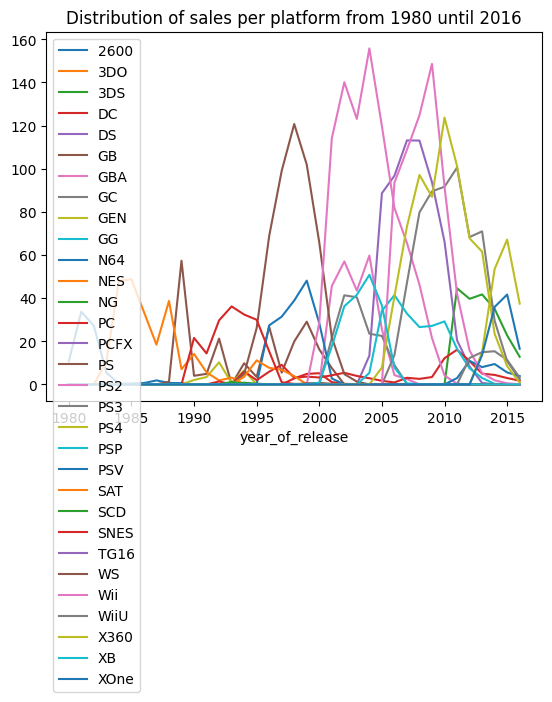

In [22]:
year_plat_groupby.plot(kind = 'line', title = 'Distribution of sales per platform from 1980 until 2016').legend(loc='upper left')
plt.show()

In [23]:
plat_groupby = df_games.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False)
plat_groupby

platform
PS2     900.93
X360    692.92
Wii     632.86
DS      614.37
PS3     604.13
PS      515.19
GBA     238.29
NES     229.90
PSP     223.91
GB      206.92
3DS     196.54
XB      191.92
SNES    181.00
N64     176.98
PS4     173.05
GC      158.41
PC      115.39
XOne    107.73
2600     81.62
WiiU     57.06
PSV      40.74
SAT      33.05
GEN      22.83
DC       14.26
SCD       1.50
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: total_sales, dtype: float64

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Lançamentos anuais e visão geral das plataformas foram endereçadas.

</div>


- #### Determinando o escopo de análise
Como podemos ver na série de gráficos e tabelas acima, houve ao longo dos quase 40 anos de dados inúmeros reposicionamentos das principais plataformas de games no mercado. Em geral, uma plataforma permanece em alta no mercado por volta de 05 anos, quando então outras passam a ocupar seu lugar (inclusive dentro de uma mesma empresa de games, onde ocorre a "canibalização" de um próprio produto em detrimento de um mais novo ou mais rentável).

Considerando o exposto, tendo em vista que o cenário de games permanece constante tanto em relação a quantidade de jogos lançados anualmente quanto os principais players de plataformas do mercado desde o ano de 2014, utilizaremos os dados entre 2014 e 2016 para nossa análise preditiva para o ano de 2017.

In [24]:
df_scope = df_games[df_games['year_of_release'] > 2013] #Filtrando dados conforme escopo.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Janela de tempo para previsão estabelecida adequadamente.

</div>


In [25]:
plat_groupby = df_scope.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False)
plat_groupby

platform
PS4     158.11
XOne     94.11
3DS      70.56
PS3      42.64
X360     32.73
WiiU     29.83
PSV      18.87
PC        9.08
Wii       2.48
PSP       0.36
Name: total_sales, dtype: float64

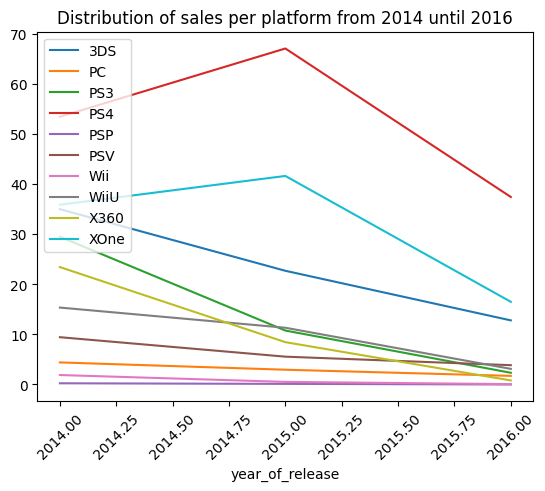

In [26]:
df_filtered = df_games[df_games['platform'].isin(df_scope['platform'])] #Filtrando dados do dataframe original apenas para as plataformas atuantes entre 2014 e 2016.
#Criando Groupby para avaliar distribuição de vendas recente das plataformas.
year_plat_groupby = df_scope.groupby(by = ['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
year_plat_groupby.plot(kind = 'line', title = 'Distribution of sales per platform from 2014 until 2016', rot = 45).legend(loc='upper left')
plt.show()

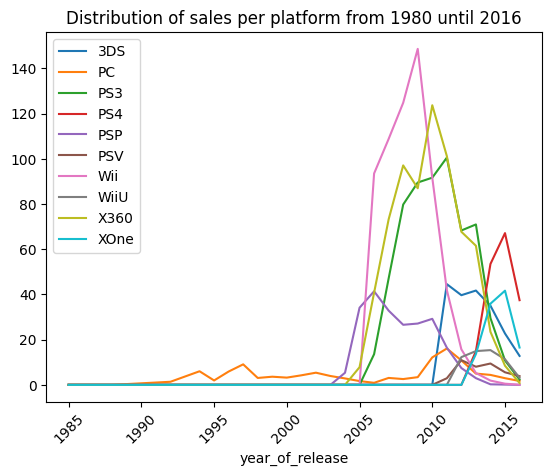

In [27]:
#Criando Groupby para avaliar a distribuição de vendas desde 1980
year_plat_groupby = df_filtered.groupby(by = ['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
year_plat_groupby.plot(kind = 'line', title = 'Distribution of sales per platform from 1980 until 2016', rot = 45).legend(loc='upper left')
plt.show()

Como podemos ver, apenas duas plataformas estavam em alta entre 2014 e 2015: PS4 e XOne, das grandes concorrentes Sony e Microsoft. Todas as demais já estavam em baixa e apenas seguiram em baixa para 2016. Como mencionado anteriormente, uma plataforma permanece em alta no mercado por volta de 05 anos, quando então outras passam a ocupar seu lugar (inclusive dentro de uma mesma empresa de games, onde ocorre a "canibalização" de um próprio produto em detrimento de um mais novo ou mais rentável).\
Considerando o longo prazo, plataformas como o PC seguem atrativas e com um público-alvo fiel, apesar de apresentarem representatividade muito menor do que as grandes marcas de console.\
Sendo assim, as principais plataformas que serão avaliadas como potencial de arrecadação para 2017 serão apenas PS4 e XOne.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Lembre-se de calcular também o ciclo de vida das plataformas.

</div>


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

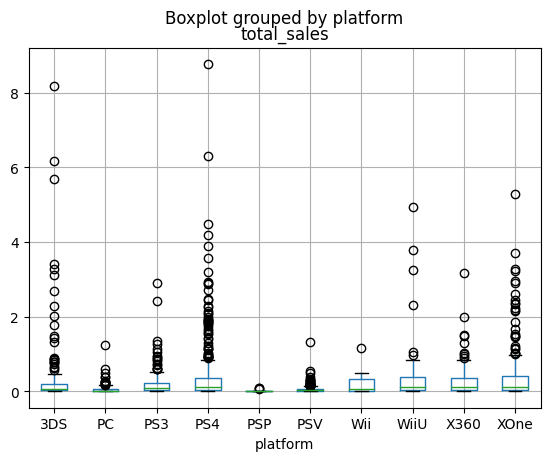

In [28]:
#Construindo diagrama de caixa
df_scope.boxplot(column='total_sales', by='platform')

É possível verificar no boxplot acima que cada plataforma possui uma grande quantidade de outliers, o que indica que todos possuem jogos-chave que elevam a média e o total de vendas da plataforma. Quando analisamos os principais identificados anteriormente, eles possuem inclusive outliers dentro dos outliers, o que fica mais evidente no PS4.\
Plataformas como PSP e WII possuem distribuição mais uniforme, com menos outliers.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Estudo adicional de platadormas endereçado.

</div>


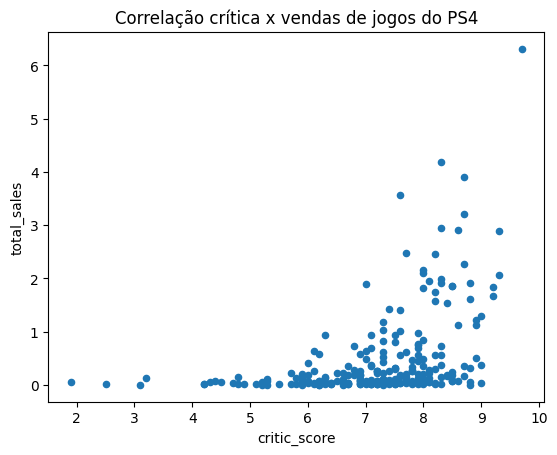

In [29]:
df_ps4 = df_scope[df_scope['platform'] == 'PS4'] #Filtro do DF para análise apenas da plataforma PS4
df_ps4.plot(x='critic_score', y='total_sales', kind = 'scatter', title = 'Correlação crítica x vendas de jogos do PS4')
plt.show()

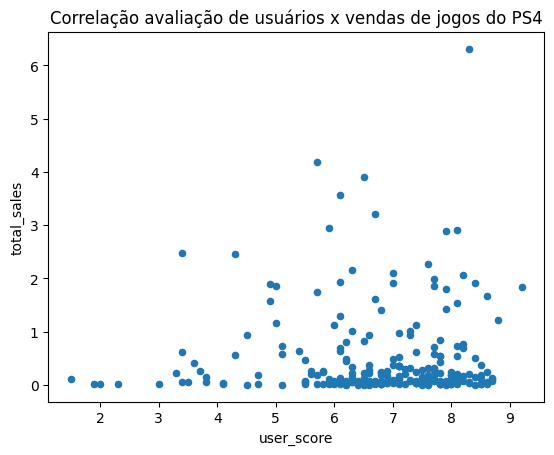

In [30]:
df_ps4.plot(x='user_score', y='total_sales', kind = 'scatter', title = 'Correlação avaliação de usuários x vendas de jogos do PS4')
plt.show()

Claramente jogos melhor avaliados geram mais vendas. Isso fica mais claro quando falamos da avaliação de críticos, pois a avaliação de usuários é mais dispersa.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfil de correlação entre avaliações e vendas conduzido.

</div>


In [31]:
df_scope.sort_values(by = 'total_sales', ascending = False).head(10) #Visualizando jogos mais vendidos


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,8.77
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,8.19
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,6.31
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,6.18
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,5.69
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,5.28
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,8.8,9.1,E,4.94
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,4.49
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,4.18
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,8.7,6.5,M,3.90


In [32]:
#Guardando 5 principais games vendidos:
top_5 = df_scope.sort_values(by = 'total_sales', ascending = False).head(10)['name'].reset_index(drop=True)
#Montando groupby para visualizar vendas dos principais jogos em todas as plataformas
plat_game_groupby = df_scope[df_scope['name'].isin(top_5)].groupby(by = ['name', 'platform'])['total_sales'].sum().unstack(fill_value=0)
plat_game_groupby

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne
name,,,,,,,
Call of Duty: Advanced Warfare,0.00,0.18,2.43,4.18,0.00,3.17,3.71
Call of Duty: Black Ops 3,0.00,0.01,0.82,8.77,0.00,1.30,5.28
Fallout 4,0.00,0.61,0.00,3.90,0.00,0.00,2.90
Grand Theft Auto V,0.00,0.48,0.00,6.31,0.00,0.00,3.28
Mario Kart 8,0.00,0.00,0.00,0.00,4.94,0.00,0.00
Pokemon Omega Ruby/Pokemon Alpha Sapphire,8.19,0.00,0.00,0.00,0.00,0.00,0.00
Pokemon Sun/Moon,5.69,0.00,0.00,0.00,0.00,0.00,0.00
Star Wars Battlefront (2015),0.00,0.17,0.00,4.49,0.00,0.00,2.38
Super Smash Bros. for Wii U and 3DS,6.18,0.00,0.00,0.00,3.79,0.00,0.00


Dentre os jogos mais vendidos, podemos ver que 3 são exclusivos de algumas plataformas. Como vimos anteriormente, estes são os outliers que elevam o patamar de vendas da plataforma.

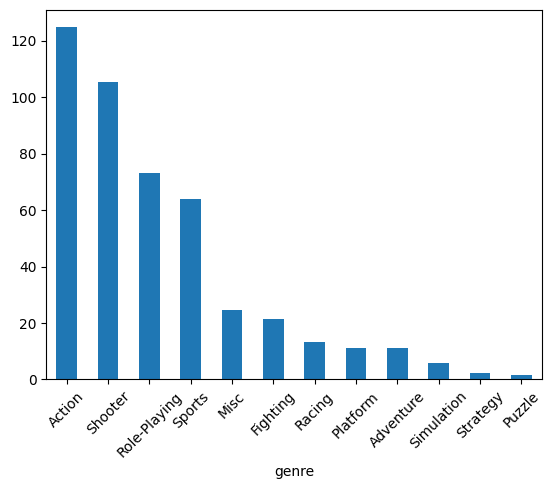

In [33]:
#Definindo groupby por gênero:
genre_groupby = df_scope.groupby(by = 'genre')['total_sales'].sum().sort_values(ascending = False)
genre_groupby.plot(kind = 'bar', rot = 45)
plt.show()

Com relação aos principais gêneros de games vendidos, há claramente os mais rentáveis e os de nicho. Action, RPG, Shooter e Sports despontam como os principais gêneros mais vendidos, com vantagem para Action e Shooter.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Análise por gêneros conduzida!

</div>


<div class="alert alert-info">
<strong>Comentário do revisor v1</strong>

No aguardo das sessões 4 e 5 :)

</div>


- ### Estratificação por região

    - #### NA - América do Norte

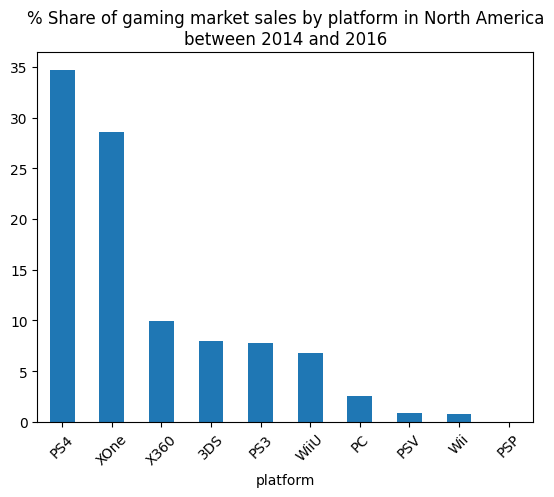

In [34]:
#Criando tabela com dados de vendas por plataforma dentro do escopo analisado (dados em %)
na_groupby = df_scope.groupby(by = 'platform')['na_sales'].sum().sort_values(ascending = False) / df_scope['na_sales'].sum() * 100
na_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by platform in North America\nbetween 2014 and 2016')
plt.show()

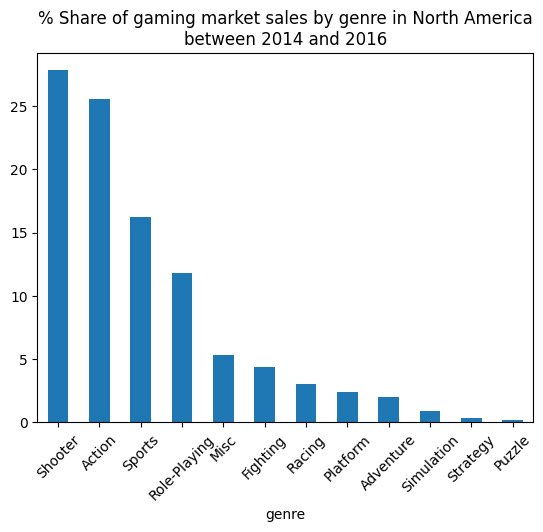

In [35]:
#Criando tabela com dados de vendas por gênero dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'genre')['na_sales'].sum().sort_values(ascending = False) / df_scope['na_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by genre in North America\nbetween 2014 and 2016')
plt.show()

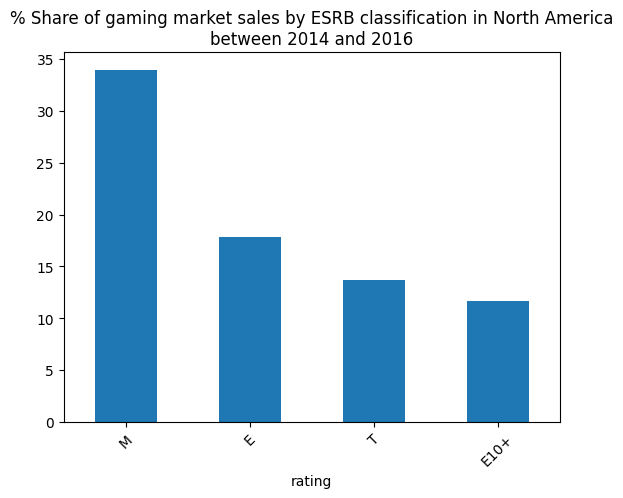

In [36]:
#Criando tabela com dados de vendas por classificação ESRB dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'rating')['na_sales'].sum().sort_values(ascending = False) / df_scope['na_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by ESRB classification in North America\nbetween 2014 and 2016')
plt.show()

- ### Estratificação por região
  
    - #### UE - Europa

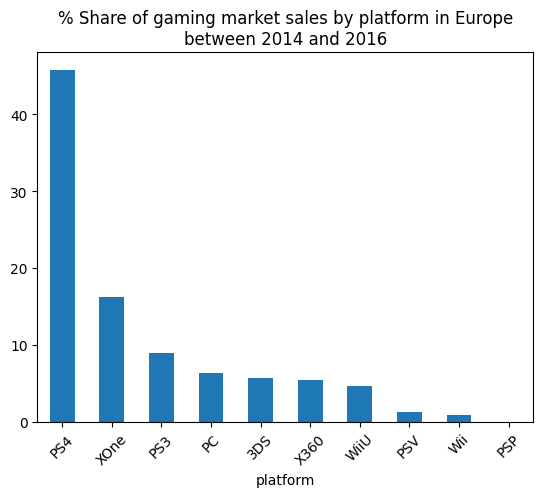

In [37]:
#Criando tabela com dados de vendas por plataforma dentro do escopo analisado (dados em %)
na_groupby = df_scope.groupby(by = 'platform')['eu_sales'].sum().sort_values(ascending = False) / df_scope['na_sales'].sum() * 100
na_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by platform in Europe\nbetween 2014 and 2016')
plt.show()

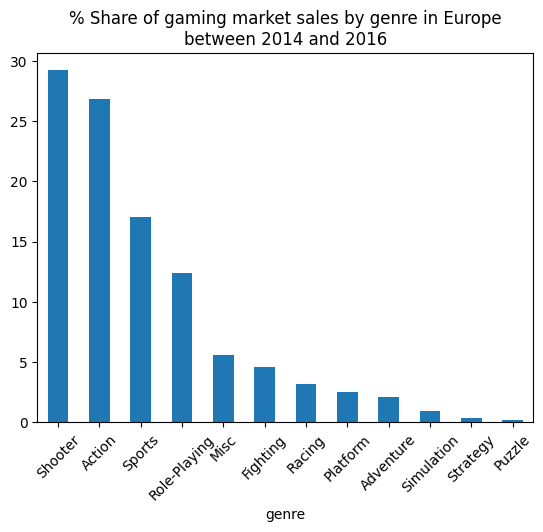

In [38]:
#Criando tabela com dados de vendas por gênero dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'genre')['na_sales'].sum().sort_values(ascending = False) / df_scope['eu_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by genre in Europe\nbetween 2014 and 2016')
plt.show()

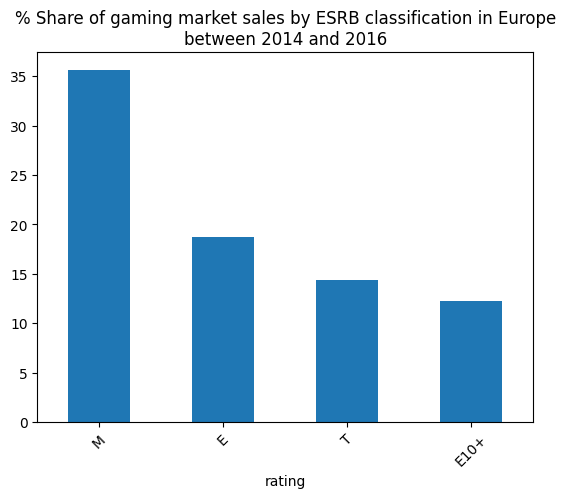

In [39]:
#Criando tabela com dados de vendas por classificação ESRB dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'rating')['na_sales'].sum().sort_values(ascending = False) / df_scope['eu_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by ESRB classification in Europe\nbetween 2014 and 2016')
plt.show()

- ### Estratificação por região
  
    - #### JP - Japão

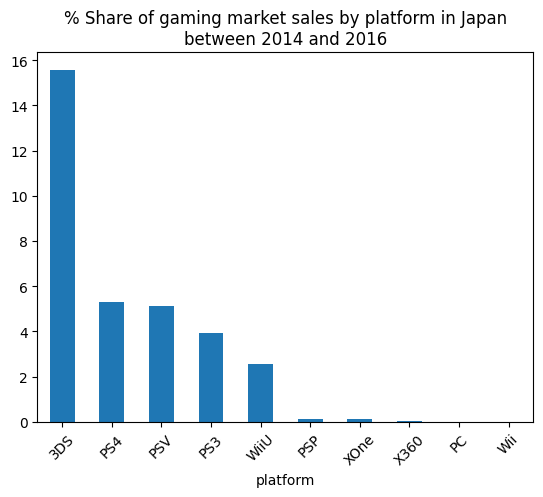

In [40]:
#Criando tabela com dados de vendas por plataforma dentro do escopo analisado (dados em %)
na_groupby = df_scope.groupby(by = 'platform')['jp_sales'].sum().sort_values(ascending = False) / df_scope['na_sales'].sum() * 100
na_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by platform in Japan\nbetween 2014 and 2016')
plt.show()

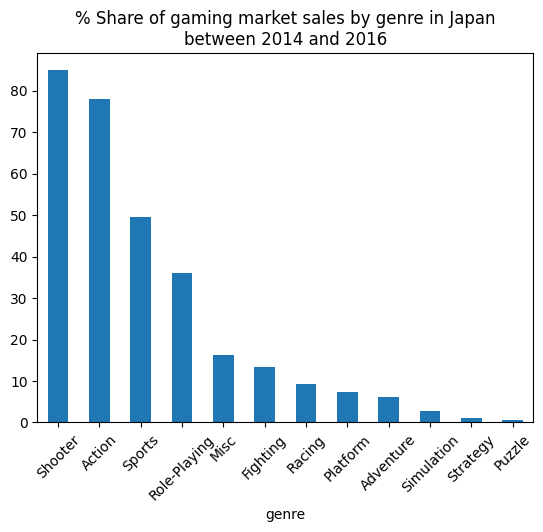

In [41]:
#Criando tabela com dados de vendas por gênero dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'genre')['na_sales'].sum().sort_values(ascending = False) / df_scope['jp_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by genre in Japan\nbetween 2014 and 2016')
plt.show()

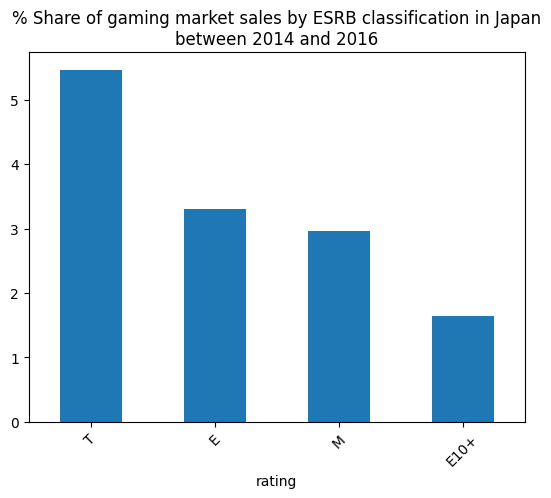

In [42]:
#Criando tabela com dados de vendas por classificação ESRB dentro do escopo analisado (dados em %)
na_genre_groupby = df_scope.groupby(by = 'rating')['jp_sales'].sum().sort_values(ascending = False) / df_scope['eu_sales'].sum() * 100
na_genre_groupby.plot(kind = 'bar', rot = 45, title = '% Share of gaming market sales by ESRB classification in Japan\nbetween 2014 and 2016')
plt.show()

- ### Análise share geral das três regiões

In [43]:
#Criando variáveis para cálculo das frações de cada região no total avaliado.
#f-string aplicada para facilitar a visualização dos dados.
na_s = df_scope['na_sales'].sum()
eu_s = df_scope['eu_sales'].sum()
jp_s = df_scope['jp_sales'].sum()
tot_s = na_s + eu_s + jp_s
na_fraction = na_s / tot_s
eu_fraction = eu_s / tot_s
jp_fraction = jp_s / tot_s
message = (
f"Fração de Vendas:\n"
f"América do Norte: {na_fraction:.2%}\n"
f"Europa: {eu_fraction:.2%}\n"
f"Japão: {jp_fraction:.2%}"
)
print(message)

Fração de Vendas:
América do Norte: 43.85%
Europa: 41.78%
Japão: 14.37%


- ### Conclusões da estratificação regional

    - Os Estados unidos possuem um share da marca XBOX acima dos demais, provavelmente muito devido ao fato da empresa Microsoft ser local. Isso difere muito das demais regiões analisadas.
    - O Japão vai na contra-mão das demais regiões, figurando a plataforma '3DS' na primeira colocação de vendas na região.
    - A distribuição de gêneros não muda entre as regiões. Os principais são os mesmos em todo o mundo: Shooter e Action.
    - A distribuição de vendas de jogos é sempre a mesma quando falamos de classificação etária também. Jogos para adultos (+17) são campeões de vendas em todo o mundo.



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação. Muito bom!
</div>


- ## Etapa 05: Testes de hipóteses

- ##### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [44]:
# Filtrando os dados para as plataformas Xbox One e PC
xbox_scores = df_scope[df_scope['platform'] == 'XOne']['user_score']
pc_scores = df_scope[df_scope['platform'] == 'PC']['user_score']

#Avaliando as variâncias para o teste t (não consideraremos iguais)
print(xbox_scores.var())
print(pc_scores.var())

1.8910066518847009
2.901154315133451


In [45]:
# Nível de significância
alpha = 0.05

# Realizando o teste t
t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var = False, nan_policy='omit')

# Exibição de resultados
print(f'Estatística t: {t_stat}')
print(f'Valor-p: {p_value}')

# Análise do valor p
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As classificações médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. As classificações médias são iguais.")

Estatística t: 1.5777606474474923
Valor-p: 0.11601398086668943
Não rejeitamos a hipótese nula. As classificações médias são iguais.


- ##### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [46]:
# Filtrando os dados para os gêneros Action e Sports
action = df_scope[df_scope['genre'] == 'Action']['user_score']
sports = df_scope[df_scope['genre'] == 'Sports']['user_score']

#Avaliando as variâncias para o teste t (não consideraremos iguais)
print(action.var())
print(sports.var())

1.8984766584766581
3.4469791276090485


In [47]:
# Nível de significância
alpha = 0.05

# Realizando o teste t
t_stat, p_value = st.ttest_ind(action, sports, equal_var = False, nan_policy='omit')

# Exibição de resultados
print(f'Estatística t: {t_stat}')
print(f'Valor-p: {p_value}')

# Análise do valor p
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As classificações médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. As classificações médias são iguais.")

Estatística t: 8.384614718486116
Valor-p: 1.182555038264477e-14
Rejeitamos a hipótese nula. As classificações médias são diferentes.


- #### Premissas e conclusões para os testes de hipótese
    - Ambos os testes foram para definir se dados eram significativamente iguais ou diferentes. Desta forma, a hipótese nula escolhida foi que "as classificações médias são iguais", e a hipótese alternativa foi que "as classificações médias são diferentes".
    - Foi estabelecido um valor de 5% para o nível de significância, que é um valor usual utilizado no mercado. Tendo em vista que o primeiro teste apresentou um percentual acima de 10% e o segundo um valor próximo de zero, o valor de alfa foi bem definido.
    - Escolhi utilizar o parâmetro equal_var = False, pois a análise prévia das variâncias indicou que eram diferentes. A conclusão, entretanto, não mudaria se não o utilizássemos.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>



- ## Conclusões
Considerando o objetivo do estudo, a partir dos dados obtidos podemos extrair as seguintes principais conclusões:

- O lançamento de jogos de forma global deve focar inicialmente na plataforma PS4, que está em alta no ano de 2016 e deve se manter desta forma por pelo menos mais dois anos, segundo o histórico geral de lançamento de dispositivos. Conforme histórico, outra plataforma da companhia deve ser lançada neste tempo e passará por um crescimento acelerado até efetivamente tomar o posto de maiores vendas no mercado.
- Plataformas como PC podem ser utilizadas como um "safeguard" dentro do portfolio, pois estão presentes desde a origem de jogos eletrônicos e possuem um público fiel.
- Jogos para público +17 são mais vendidos em todo o mundo. Os principais gêneros consumidos pelo mercado são Shooter e Action, porém jogos de Sports e RPG também possuem uma aceitação no mercado.
- Um ponto importante foi a queda geral nas vendas entre 2015 e 2016. Entretanto, este dado pode estar parcialmente correto, pois uma parte de 2016 pode estar ausente. De qualquer forma, não é de se esperar que o mercado aqueceu neste período, o que deve ser acompanhado de perto para os próximos anos.